# Predicting Student Success

---
Name : Darryn Johnson

Date : 10/23/2024

Instructor : Mark Barbour

Blog : 

Pace : flexce : FLEX

---
## Sources and Links 

- Github Repository : [predicting_studnet_success](https://github.com/Djohnson1313/predicting_student_success)

- Presentation Link :

- Link to dataset metadata :[dataset_metadata](https://github.com/Djohnson1313/predicting_student_success/blob/main/dataset_metadata.ipynb)

- Original Kaggle Data Set : [Predict Students Dropout and Academic Success](https://www.kaggle.com/datasets/syedfaizanalii/predict-students-dropout-and-academic-success)

- `CHRISP-DM` explination and image : [IBM](https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview)

---
# Overview

- title
    - author information
        - author name
        - date last updated
        - instructor
        - blog link
        - student pace
- sources and links
- imports
- business understanding
- data understanding
- data distribution
- data preparation
    - decoding the data
- methodoligy
    - CHRISP-DM explination
- functions
- exploritory data analysis
- model preparation
- modeling
    - `RandomForsetClassifier`
    - neural network with `Keras`
- the final model
- conclusion
    - evaluation
    - review
    - next steps

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
confusion_matrix, ConfusionMatrixDisplay,
precision_score, recall_score, 
accuracy_score, f1_score)
from keras import models, layers, optimizers
from keras.layers import Dense

import warnings
#warnings.filterwarnings('ignore')

# NOTE 
For the below cell in google colab, it may ask to rename the file. type `y` (lowercase y) into the field. 

In [2]:
#!kaggle datasets download -d syedfaizanalii/predict-students-dropout-and-academic-success
#!unzip predict-students-dropout-and-academic-success.zip 

---
# Business Understanding

The purpose of the following notebook is for a loan benefactor to be able to identify studnets who potentially may dropout of school. This is important information due to the risk associated with loaning funds to a student, mainly being getting the loan back. If a student doesnt graduate, they are more likely to not return the amount given.

- business objectives
    - predict if a student will graduate or dropout
        - success is classyifing a student correctly a majority of the time
- situation assesment
    - resources available
        - personal individual data
    - resources un-available
        - grades of enrolled students
        - some encoded data does not have decoded metadata
- data mining goals
    - assess and understand the data provided
- project plan
    - produce a usable and reliable prediction model given the accessable information  

---
# Data Understanding 

The data we have here is a dataset from [Kaggle](https://www.kaggle.com/datasets/syedfaizanalii/predict-students-dropout-and-academic-success). This data was collected with the intention of predicting the success of a student based on important demographic, academic, and socio-economic factors, which are crucial for predicting a student's academic outcome.

The data is as follows : 

- data properties
    - the original data set contains 4424 entries, with each entry being an anonymized student or applicant
    - the original data set contains 37 columns.
        - a breakdown of these columns is available in [dataset_metadata](https://github.com/Djohnson1313/predicting_student_success/blob/main/dataset_metadata.ipynb)
     
Let's take a look into the data we have.

In [3]:
df = pd.read_csv('Predict Student Dropout and Academic Success.csv', sep = ";")

In [4]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
#df.info()

In [6]:
#df.isna().sum()

The cells above are comented out due to how large the output is. If you wish to see what they show, delete the # (pound symbol) at the start of the cell. you may need to resart the kernel to get an acurate output.

---
# Data Distribution

Here we will look into the distribution of our data. we can see that a majority of our targets are graduates, with dropouts trailing not far behined. More then likely, enrolled will not be used in the modeling process as this model will not be predicting that.

<div>
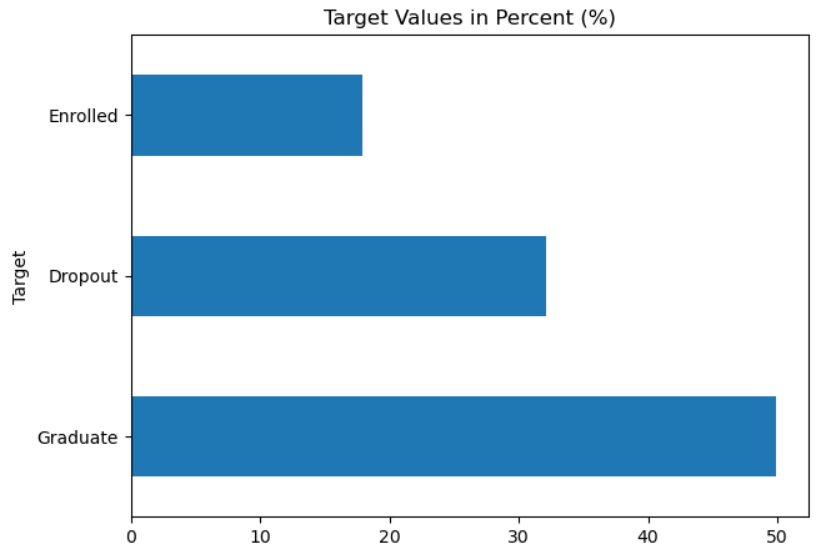
</div>

---
# Data Preparation

This next section assists with the modeling process later on. First we correct some spelling errors, and replace the encoded data with the actual data it represents.

In [7]:
df = df.rename(columns = {'Nacionality' : 'Nationality'})

In [8]:
df['Nationality'] = df['Nationality'].replace({6 : 3,11 : 4,13 : 5,14 : 6,17 : 7,21 : 8,22 : 9,24 : 10,25 : 11,26 : 12,32 : 13,
                                              41 : 14,62 : 15,100 : 16,101 : 17, 103 : 18,105 : 19,108 : 20,109 : 21 }) 

## Decoding the Data

Here we decode the data, which simply means we are taking the original data, encoded as numbers, and replacing them with what they actually represent. There are several areas where a number is being replaced with `unknown`. This is because is some metrics there are included numbers that dont have metadata associated with it. meaning we have no way of knowing what the numbers represent.  

In [9]:
df['Marital status'] = df['Marital status'].replace({
1 : 'single', 2 : 'married', 3 : 'widower', 4 : 'divorced', 5 : 'facto union', 6 : 'ligally seperated'})

In [10]:
df['Application mode'] = df['Application mode'].replace({
1 : '1st phase - general contingent', 2 : 'Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island)', 
7 : 'Holders of other higher courses', 10 : 'Ordinance No. 854-B/99', 15 : 'International student (bachelor)', 
16 : '1st phase - special contingent (Madeira Island)', 17 : '2nd phase - general contingent',
18 : '3rd phase - general contingent', 26 : 'Ordinance No. 533-A/99, item b2) (Different Plan)', 
27 : 'Ordinance No. 533-A/99, item b3 (Other Institution)', 39 : 'Over 23 years old', 
42 : 'Transfer', 43 : 'Change of course', 44 : 'Technological specialization diploma holders', 51 : 'Change of institution/course', 
53 : 'Short cycle diploma holders', 57 : 'Change of institution/course (International)'})

In [11]:
df['Course'] = df['Course'].replace({
33 : 'Biofuel Production Technologies', 171 : 'Animation and Multimedia Design', 8014 : 'Social Service (evening attendance)', 
9003 : 'Agronomy 9070 - Communication Design',9085 : 'Veterinary Nursing', 9119 : 'Informatics Engineering', 9130 : 'Equinculture', 
9147 : 'Management', 9238 : 'Social Service', 9254 : 'Tourism', 9500 : 'Nursing', 9556 : 'Oral Hygiene', 9670 : 'Advertising and Marketing Management', 
9773 : 'Journalism and Communication', 9853 : 'Basic Education', 9991 : 'Management (evening attendance)'})

In [12]:
df['Daytime/evening attendance	'] = df['Daytime/evening attendance	'].replace({1 : 'daytime', 0 : 'evening'})

In [13]:
df['Previous qualification'] = df['Previous qualification'].replace({
1 : 'Secondary education', 2 : "Higher education - bachelor's degree", 3 : 'Higher education - degree', 4 : "Higher education - master's",
5 : 'Higher education - doctorate', 6 : 'Frequency of higher education', 9 : '12th year of schooling - not completed', 
10 : '11th year of schooling - not completed', 12 : 'Other - 11th year of schooling', 14 : '10th year of schooling', 
15 : '10th year of schooling - not completed', 19 : 'Basic education 3rd cycle (9th/10th/11th year) or equiv', 
38 : 'Basic education 2nd cycle (6th/7th/8th year) or equiv', 39 : 'Technological specialization course', 40 : 'Higher education - degree (1st cycle)', 
42 : 'Professional higher technical course', 43 : 'Higher education - master (2nd cycle)'})

In [14]:
df['Nationality'] = df['Nationality'].replace({
1 : 'Portuguese', 2 : 'German', 3 : 'Spanish', 4 : 'Italian', 5 : 'Dutch', 6 : 'English', 7 : 'Lithuanian', 8 : 'Angolan', 9 : 'Cape Verdean', 
10 : 'Guinean', 11 : 'Mozambican', 12 : 'Santomean', 13 : 'Turkish', 14 : 'Brazilian', 15 : 'Romanian',16 : 'Moldova (Republic of)', 17 : 'Mexican',
18 : 'Ukrainian', 19 : 'Russian', 20 : 'Cuban', 21 : 'Colombian'})

In [15]:
df["Mother's qualification"] = df["Mother's qualification"].replace({
1 : 'Secondary Education - 12th Year of Schooling or Eq', 2 : "Higher Education - Bachelor's Degree", 3 : 'Higher Education - Degree', 
4 : "Higher Education - Master's", 5 : 'Higher Education - Doctorate', 6 : 'Frequency of Higher Education', 
9 : '12th Year of Schooling - Not Completed', 10 : '11th Year of Schooling - Not Completed', 11 : '7th Year (Old)', 
12 : 'Other - 11th Year of Schooling', 14 : '10th Year of Schooling', 18 : 'General commerce course', 
19 : 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv', 22 : 'Technical-professional course', 26 : '7th year of schooling', 
27 : '2nd cycle of the general high school course', 29 : '9th Year of Schooling - Not Completed', 30 : '8th year of schooling', 
34 : 'Unknown', 35 : "Can't read or write", 36 : 'Can read without having a 4th year of schooling', 
37 : 'Basic education 1st cycle (4th/5th year) or equiv', 38 : 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv', 
39 : 'Technological specialization course', 40 : 'Higher education - degree (1st cycle)', 41 : 'Specialized higher studies course', 
42 : 'Professional higher technical course', 43 : 'Higher Education - Master (2nd cycle)', 44 : 'Higher Education - Doctorate (3rd cycle)'})

In [16]:
df["Father's qualification"] = df["Father's qualification"].replace({
1 : 'Secondary Education - 12th Year of Schooling or Eq', 2 : "Higher Education - Bachelor's Degree", 3 : 'Higher Education - Degree', 
4 : "Higher Education - Master's", 5 : 'Higher Education - Doctorate', 6 : 'Frequency of Higher Education', 
9 : '12th Year of Schooling - Not Completed', 10 : '11th Year of Schooling - Not Completed', 11 : '7th Year (Old)', 
12 : 'Other - 11th Year of Schooling', 14 : '10th Year of Schooling', 18 : 'General commerce course', 
19 : 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv', 22 : 'Technical-professional course', 26 : '7th year of schooling', 
27 : '2nd cycle of the general high school course', 29 : '9th Year of Schooling - Not Completed', 30 : '8th year of schooling', 
34 : 'Unknown', 35 : "Can't read or write", 36 : 'Can read without having a 4th year of schooling', 
37 : 'Basic education 1st cycle (4th/5th year) or equiv', 38 : 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv', 
39 : 'Technological specialization course', 40 : 'Higher education - degree (1st cycle)', 41 : 'Specialized higher studies course', 
42 : 'Professional higher technical course', 43 : 'Higher Education - Master (2nd cycle)', 44 : 'Higher Education - Doctorate (3rd cycle)', 
33 : 'Unkown',25 : 'Unknown', 20 : 'Unknown', 13 : 'Unknown', 31 : 'Unknown'})

In [17]:
df["Mother's occupation"] = df["Mother's occupation"].replace({
0 : 'Student', 1 : 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
2 : 'Specialists in Intellectual and Scientific Activities', 3 : 'Intermediate Level Technicians and Professions', 4 : 'Administrative staff', 
5 : 'Personal Services, Security and Safety Workers and Sellers', 6 : 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 
7 : 'Skilled Workers in Industry, Construction and Craftsmen', 8 : 'Installation and Machine Operators and Assembly Workers', 9 : 'Unskilled Workers', 
10 : 'Armed Forces Professions', 90 : 'Other Situation', 99 : '(blank)', 122 : 'Health professionals', 123 : 'teachers',
125 : 'Specialists in information and communication technologies (ICT)', 131 : 'intermediate level science and engineering technicians and professions',
132 : 'Technicians and professionals, of intermediate level of health', 
134 : 'Intermediate level technicians from legal, social, sports, cultural and similar services', 
141 : 'Office workers, secretaries in general and data processing operators', 
143 : 'Data, accounting, statistical, financial services and registry-related operators', 144 : 'Other administrative support staff',
151 : 'personal service workers', 152 : 'sellers', 153 : 'Personal care workers and the like', 
171 : 'Skilled construction workers and the like, except electricians', 
173 : 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like', 
175 : 'Workers in food processing, woodworking, clothing and other industries and crafts', 191 : 'cleaning workers', 
192 : 'Unskilled workers in agriculture, animal production, fisheries and forestry', 
193 : 'Unskilled workers in extractive industry, construction, manufacturing and transport', 194 : 'Meal preparation assistants'})

In [18]:
df["Father's occupation"] = df["Father's occupation"].replace({
0 : 'Student', 1 : 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
2 : 'Specialists in Intellectual and Scientific Activities', 3 : 'Intermediate Level Technicians and Professions', 4 : 'Administrative staff', 
5 : 'Personal Services, Security and Safety Workers and Sellers', 6 : 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 
7 : 'Skilled Workers in Industry, Construction and Craftsmen', 8 : 'Installation and Machine Operators and Assembly Workers', 9 : 'Unskilled Workers', 
10 : 'Armed Forces Professions', 90 : 'Other Situation', 99 : '(blank)', 122 : 'Health professionals', 123 : 'teachers',
125 : 'Specialists in information and communication technologies (ICT)', 131 : 'intermediate level science and engineering technicians and professions',
132 : 'Technicians and professionals, of intermediate level of health', 
134 : 'Intermediate level technicians from legal, social, sports, cultural and similar services', 
141 : 'Office workers, secretaries in general and data processing operators', 
143 : 'Data, accounting, statistical, financial services and registry-related operators', 144 : 'Other administrative support staff',
151 : 'personal service workers', 152 : 'sellers', 153 : 'Personal care workers and the like', 
171 : 'Skilled construction workers and the like, except electricians', 
173 : 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like', 
175 : 'Workers in food processing, woodworking, clothing and other industries and crafts', 191 : 'cleaning workers', 
192 : 'Unskilled workers in agriculture, animal production, fisheries and forestry', 
193 : 'Unskilled workers in extractive industry, construction, manufacturing and transport', 194 : 'Meal preparation assistants', 163 : 'Unknown', 
103 : 'Unknown', 135 : 'Unknown', 181 : 'Unknown', 174 : 'Unknown', 112 : 'Unknown', 101 : 'Unknown', 114 : 'Unknown', 154 : 'Unknown', 
183 : 'Unknown', 102 : 'Unknown', 172 : 'Unknown', 182 : 'Unknown', 195 : 'Unknown', 124 : 'Unknown'})

---
## Methodoligy

A common methodology used when attempting to create a model is `CRISP-DM`, which stands for:

- `CR`oss
- `I`dustry
- `S`tandard
- `p`rocess
- (for)
- `D`ata
- `M`ining

A good visual for how this works is a model designed by [IBM](https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview)

<div>
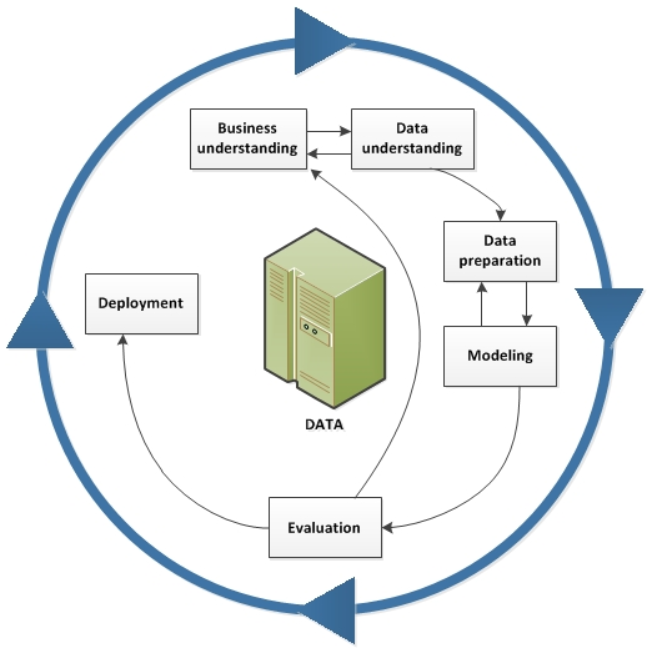
</div>

This methodolgy is an overarhcing workflow style, where upon completing a step in the cycle, the next step is started and so on. Where this model really helps though is that its not linear, meaning if needed, returning to a previous step can assist with assuring a thorough and complete modeling process.

---
# Functions

Here we create a handmade function to assist with repetitive code blocks.

In [19]:
def get_metrics(y_train, pred):
    '''
    bundles together accuracy, precision, recall and f1 score into one function.
    
    requirements : this function requires 2 inputs, the y_values as dtype(object) and pred as dtype(numpy.ndarry)
    '''   
    
    acc = accuracy_score(y_train, pred)
    prec = precision_score(y_train, pred, average = 'macro', zero_division = np.nan)
    rec = recall_score(y_train, pred, average = 'macro')
    f1 = f1_score(y_train, pred, average = 'macro')
    print('accuracy:', acc)
    print('precision:', prec)
    print('recall:', rec)
    print('f1 score:', f1)

---
# Exploritory Data Analysis (EDA)

Lets dive more into the data we have, and see if we can get a base understanding of what we're working with. This step assists us with the modeling phase, as it allows us to have a deeper understanding of what the results may look like.

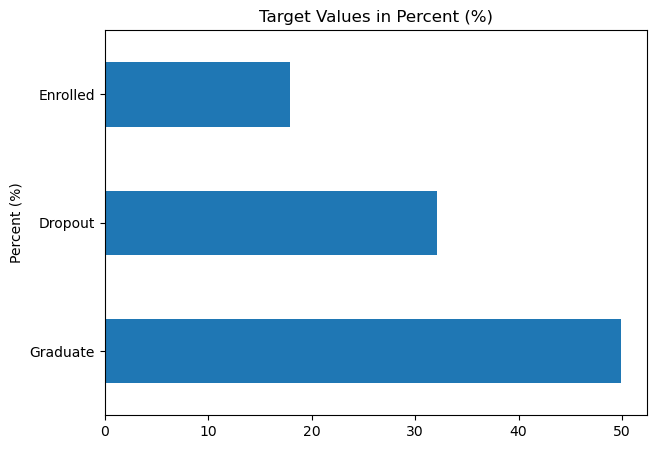

In [20]:
fig, ax = plt.subplots(figsize = (7,5))
target_bar = df['Target'].value_counts(normalize = True) * 100
target_bar.plot(kind = 'barh', rot = 'horizontal')
ax.set_title('Target Values in Percent (%)')
ax.set_ylabel('Percent (%)')
plt.show();

In [21]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

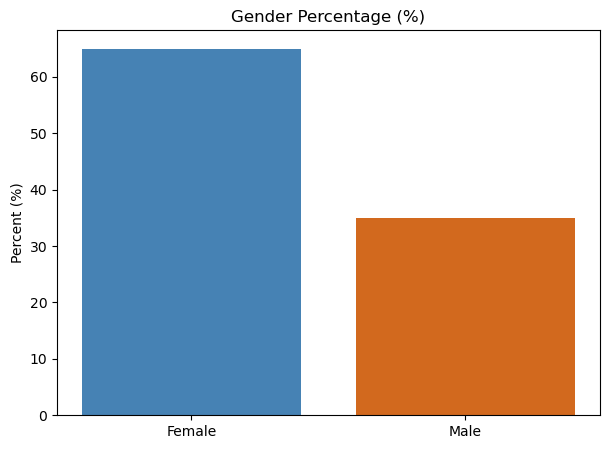

In [22]:
fig, ax = plt.subplots(figsize = (7,5))

categories = ['Female', 'Male']
vals = [65, 35]
colors = ['steelblue', 'chocolate']
plt.bar(categories, vals, color = colors)
ax.set_title('Gender Percentage (%)')
ax.set_ylabel('Percent (%)')
plt.show();

In [23]:
df['Gender'].value_counts()

Gender
0    2868
1    1556
Name: count, dtype: int64

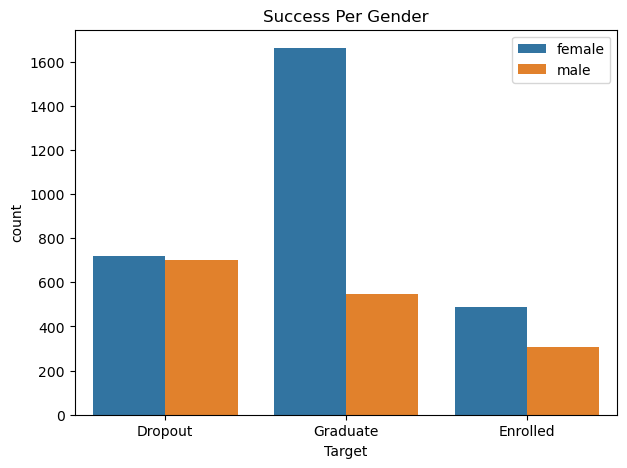

In [24]:
fig, ax = plt.subplots(figsize = (7, 5)) # create figure
sns.countplot(data = df, x = 'Target', hue = 'Gender') # assigns x and y values
ax.set_title('Success Per Gender') # title
labels = ['female', 'male']
plt.legend(labels)
plt.show(); # output

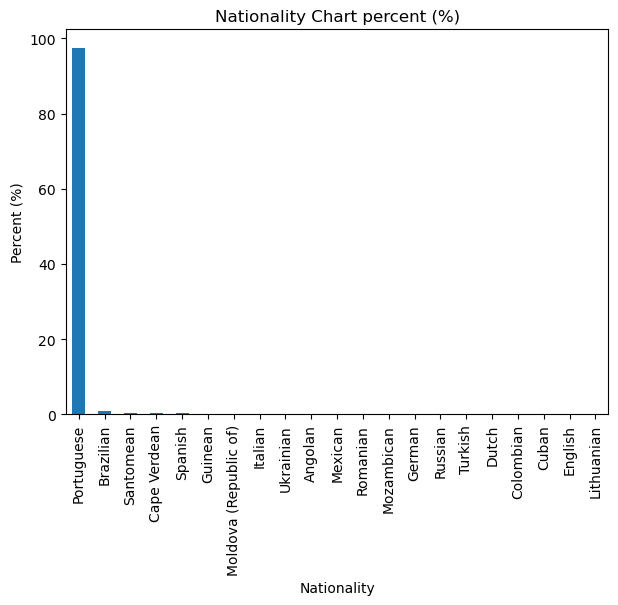

In [25]:
fig, ax = plt.subplots(figsize = (7,5))
nat_bar = df['Nationality'].value_counts() / len(df['Nationality']) * 100
nat_bar.plot(kind = 'bar')
ax.set_title('Nationality Chart percent (%)')
ax.set_ylabel('Percent (%)')
plt.show();

In [26]:
df['Nationality'].value_counts()

Nationality
Portuguese               4314
Brazilian                  38
Santomean                  14
Cape Verdean               13
Spanish                    13
Guinean                     5
Moldova (Republic of)       3
Italian                     3
Ukrainian                   3
Angolan                     2
Mexican                     2
Romanian                    2
Mozambican                  2
German                      2
Russian                     2
Turkish                     1
Dutch                       1
Colombian                   1
Cuban                       1
English                     1
Lithuanian                  1
Name: count, dtype: int64

In [27]:
len(df['Nationality'])

4424

In [28]:
(4314 / 4414) * 100

97.73448119619393

`Nationality` is heavily skewed toward one nationality, that being Portuguese at 97% of the population. Due to this, we will only be using portuguese entries as the minority nationalities only add noise for the model.

---
# Model Preparation

Here we will prepare the data specifically for modeling. We will only use Portuguese entries, encode the target as binary, one-hot encode our data and use `train_test_split` to validate our data. 

In [29]:
df.drop(df[df['Target'] == 'Enrolled'].index, inplace = True)

In [30]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [31]:
le = LabelEncoder()
seed = 13
df['Target'] = le.fit_transform(df['Target'])

In [32]:
df['Target'].value_counts()

Target
1    2209
0    1421
Name: count, dtype: int64

In [33]:
df1 = df[df['Nationality'] == 'Portuguese'].copy()

In [34]:
df1 = df1.drop('Nationality', axis = 1)

In [35]:
cat_data = ['Marital status', 'Application mode', 'Application order', 'Course', 'Previous qualification',
          "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]

In [36]:
ohe_df = pd.get_dummies(df1, cat_data, drop_first = True, dtype = int)

In [37]:
y = ohe_df['Target']
x = ohe_df.drop(columns = 'Target', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = seed)

---
# Modeling With `RandomForestClassifier`

Here we get into the actual modeling of the data. We will use `RandomForestClassifier` as our modeler, as its really simple to use and works very well for what we are trying to accomplish. The data is already one-hot encoded and split using `train_test_split`. All future modeling will use this data as the baseline.

In [38]:
rf = RandomForestClassifier(random_state = seed)

In [39]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=13)

In [40]:
pred_rf = rf.predict(x_test)

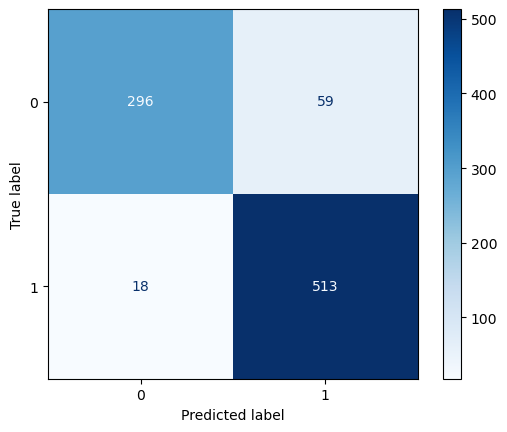

In [41]:
cnf_matrix = confusion_matrix(y_test, pred_rf) # assign what to use in plot
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=rf.classes_) # create plot
disp.plot(cmap=plt.cm.Blues); # output

In [42]:
get_metrics(y_test, pred_rf)

accuracy: 0.9130925507900677
precision: 0.9197641530444078
recall: 0.8999522559083313
f1 score: 0.9075466149528328


Below we have a pipeline and gridsearch. The output of this cell is commented out due to how long it takes to run. On my local system, it takes about 10-15 minutes to post results. If you wish to see the results directly from the model, feel free to remove the pound symbols. The output of the pipeline is commented below.

In [43]:
pipe = Pipeline([('rfc', RandomForestClassifier(random_state = seed))])

params = [{'rfc__n_estimators' : (500, 1000, 1500),
          'rfc__max_depth' : (10, 50, 100),
          'rfc__criterion' : ('gini', 'entropy'),
          'rfc__max_features' : (10, 50, 100)}]

grid = GridSearchCV(pipe, params)

In [44]:
#grid.fit(x_train, y_train)

In [45]:
#grid.best_params_

pipeline results :

- rfc__criterion: 'gini'
- rfc__max_depth: 50
- rfc__max_features: 50
- rfc__n_estimators: 1000

In [46]:
rf1 = RandomForestClassifier(random_state = seed, criterion = 'gini', 
                             max_depth = 50, max_features = 50, n_estimators = 1000)

In [47]:
rf1.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, max_features=50, n_estimators=1000,
                       random_state=13)

In [48]:
pred_rf1 = rf1.predict(x_test)

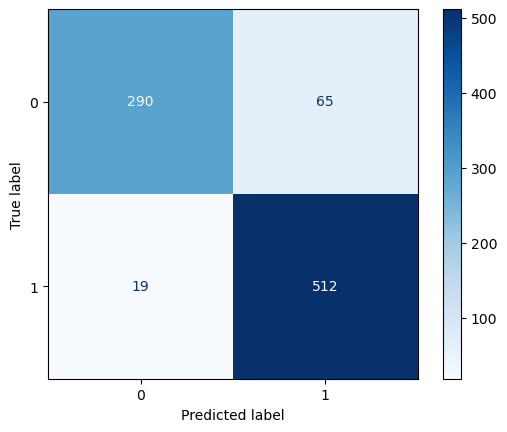

In [49]:
cnf_matrix = confusion_matrix(y_test, pred_rf1) # assign what to use in plot
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=rf1.classes_) # create plot
disp.plot(cmap=plt.cm.Blues); # output

In [50]:
get_metrics(y_test, pred_rf1)

accuracy: 0.9051918735891648
precision: 0.9129298402068504
recall: 0.8905599320972919
f1 score: 0.8988408507676917


Our final model performed very well, with a precision score of 91%. In this case, it means 91% of the time, the model correctly labeled the positive text as positive text. Lets try a different model to see if we can get even better results.

# Modeling With `KERAS` (Neural Network)
`Keras` is a neural network that works in layers. Each layer taking into account what the last layer output. Neural networks are a bit of a black box, meaning the interworkings of the model are convoluted. Neural networks are also more difficult to prepare the data for as well as more difficult to actually use. 

In [51]:
scaler = StandardScaler()
scaled_xt = scaler.fit_transform(x_train)

In [52]:
model = models.Sequential()
model.add(layers.Dense(50, activation = 'sigmoid'))
model.add(layers.Dense(50, activation = 'sigmoid'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', metrics = ['acc', 'precision'])

In [53]:
history = model.fit(scaled_xt, 
                    y_train, 
                   epochs = 100,
                   batch_size = 25)

Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - acc: 0.6541 - loss: 0.6233 - precision: 0.6435
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - acc: 0.8235 - loss: 0.4329 - precision: 0.8207
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - acc: 0.8686 - loss: 0.3397 - precision: 0.8778
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - acc: 0.9013 - loss: 0.2739 - precision: 0.9079
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - acc: 0.9057 - loss: 0.2656 - precision: 0.9079
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - acc: 0.9046 - loss: 0.2611 - precision: 0.9018
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.9252 - loss: 0.2252 - precision: 0.9215
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - acc: 0.9242 - loss: 0.2209 - precision: 0.9175
Epoch 9/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - acc: 0.9261 - loss: 0.2058 - precision: 0.9168
Epoch 10/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - acc: 0.9

In [54]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'precision'])

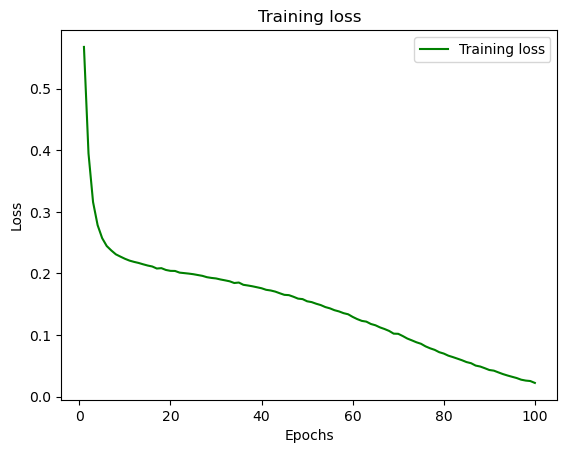

In [55]:
history_dict = history.history
loss_values = history_dict['loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Here we see training loss, with lower being better. 

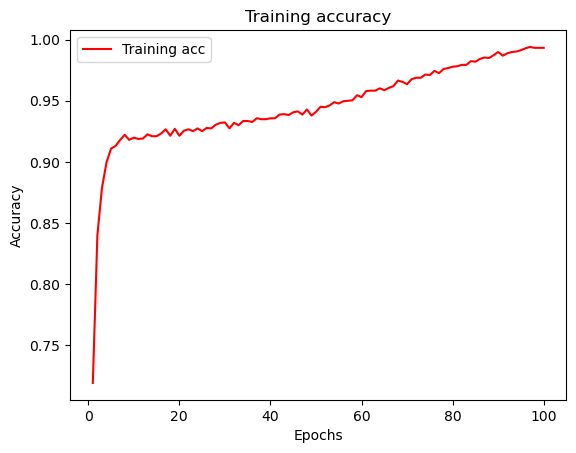

In [56]:
acc_values = history_dict['acc'] 

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Here we see training accuracy, with higher the better.

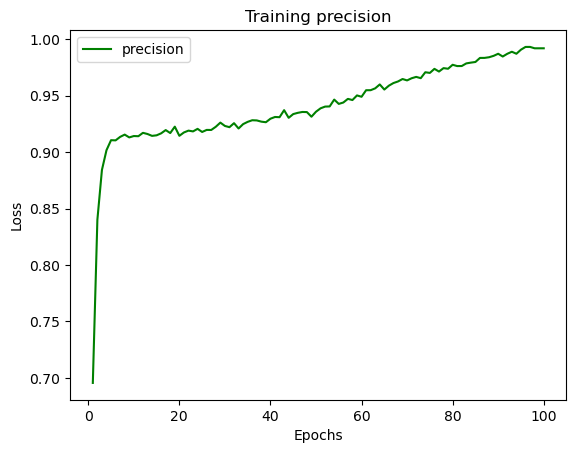

In [57]:
history_dict = history.history
precision_values = history_dict['precision']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, precision_values, 'g', label='precision')

plt.title('Training precision')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Here we see training precision. This is our main metric we want to keep an eye on. This metric needs to be as high as possible.

In [58]:
scaler = StandardScaler()
scaled_x_test = scaler.fit_transform(x_test)

In [59]:
pred = model.predict(scaled_x_test) 

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [60]:
results_train = model.evaluate(scaled_xt, y_train)
results_train

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - acc: 0.9976 - loss: 0.0158 - precision: 0.9970 


[0.017127346247434616, 0.9966139793395996, 0.995702862739563]

In [61]:
results_test = model.evaluate(scaled_x_test, y_test)
results_test

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - acc: 0.8766 - loss: 0.6309 - precision: 0.8962


[0.5817059874534607, 0.8905192017555237, 0.8945454359054565]

Our final precision score for the neural network is 87%. This score represents how often the false positive mistake is made by the model. In this case, it means 87% of the time, the model correctly labeled the positive text as positive text. While this is a good score, the random forest model actually performed better, is it scored 91% on the test data.

---
# The Final Model

In [62]:
rf1 = RandomForestClassifier(random_state = seed, criterion = 'gini', 
                             max_depth = 50, max_features = 50, n_estimators = 1000)

In [63]:
rf1.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, max_features=50, n_estimators=1000,
                       random_state=13)

In [64]:
pred_rf = rf.predict(x_test)

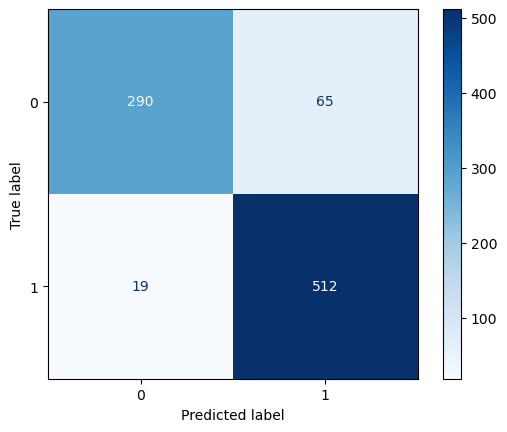

In [65]:
cnf_matrix = confusion_matrix(y_test, pred_rf1) # assign what to use in plot
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=rf1.classes_) # create plot
disp.plot(cmap=plt.cm.Blues); # output

In [66]:
get_metrics(y_test, pred_rf1)

accuracy: 0.9051918735891648
precision: 0.9129298402068504
recall: 0.8905599320972919
f1 score: 0.8988408507676917


---
# Conclusion
This conclusion will include three short subsections breaking down the evaluation on the modeling process.

## Evaluation

To evaluate the model, we used _precision_, a measurment of the _false positive_ rate. This is important to us as a loan company as this metric can falsely predcit a student to graduate. This impacts us because a student that does not gradute is unlikely to get a job that can support repaying the loan we provided. 

## Review

Pitting the two models against each other, neural networks with `Keras` and `RandomForestClassfifer`, we found for this specifc dataset and business problem, `RandomForestClassfifer` came out on top by 4% relating to the precision score. For this reason, the `RandomForestClassfifer` model is the model we will move forward with.

## Next Steps

If this model is acceped as sufficeient, the next step will be deployment (and iteratins as needed), as outlined in the CRISP-DM model.